# Hierarchical Clustering

The objective of this lab is to become familiar with **hierarchical clustering** and to work with **dendrograms**.

## Imports

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.cluster.hierarchy import dendrogram, cut_tree, linkage
import seaborn as sns

In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

In [4]:
from sknetwork.data import karate_club, load_netset
from sknetwork.embedding import GSVD
from sknetwork.visualization import svg_graph

## Iris dataset

We start with the Iris dataset.

In [192]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = list(iris.target_names)

In [197]:
feature_names, label_names, np.unique(y, return_counts=True)

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 ['setosa', 'versicolor', 'virginica'],
 (array([0, 1, 2]), array([50, 50, 50])))

In [198]:
# hierarchical clustering
Z = linkage(X, method='ward')

In [199]:
Z.shape

(149, 4)

In [201]:
Z[:5].astype(int)

array([[101, 142,   0,   2],
       [  7,  39,   0,   2],
       [  0,  17,   0,   2],
       [  9,  34,   0,   2],
       [128, 132,   0,   2]])

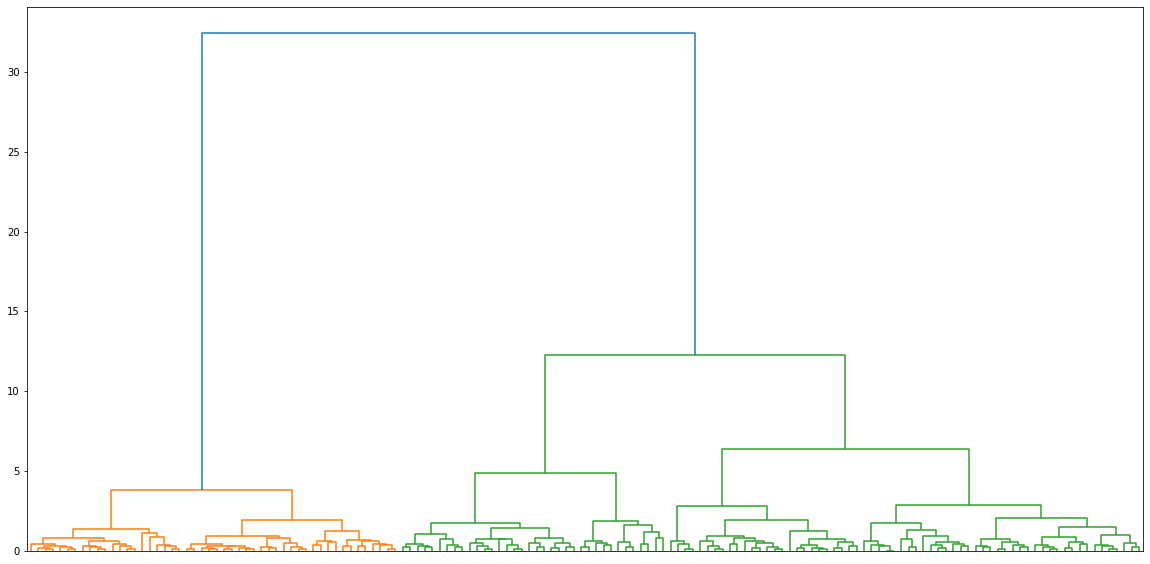

In [202]:
fig, ax = plt.subplots(figsize=(20,10))
dendrogram(Z, no_labels=True)
plt.show()

## To do

* What are the two first flowers merged? Compare their features.
* Give the 2 first clusters. Show the contingency matrix.
* Give the 3 first clusters. Give the ARI and AMI of the clustering. Compare with K-Means.
* Test other linkages.
* Complete the function ``get_best_cuts`` and select the 2 best cuts of the dendrogram.

In [212]:
y_pred = cut_tree(Z, 3).ravel()

In [213]:
y_pred[:,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [214]:
np.unique(y_pred, return_counts=True)

(array([0, 1, 2]), array([50, 64, 36]))

Score 'adjusted_rand_score' : 73.12%


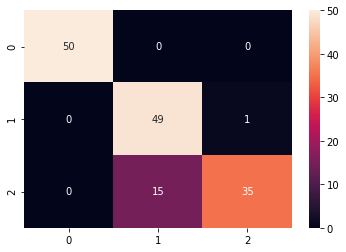

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print("Score 'adjusted_rand_score' : {}%".format(np.round(adjusted_rand_score(y,y_pred)*100,2)))
sns.heatmap(confusion_matrix(y, y_pred), annot = True);

In [174]:
def get_best_cuts(Z, k_max=10):
    '''Cuts in decreasing order of height gaps. 
    If the best cut is with 2 clusters, the returned vector starts with 2.
    
    Parameters
    ----------
    Z: np.ndarray
        Dendrogram
    k_max: int
        Maximum number of clusters
    Returns
    -------
    cuts: np.ndarray
        Cuts.
    '''

    """
    Souhail
    scores = {}
    for iter in range(k_max):
        y_pred = cut_tree(Z, 3).ravel()
        score = adjusted_rand_score(y,y_pred)
        scores[iter] = score
        best_cut = max(scores.items(), key=operator.itemgetter(1))[0]
        best_score = scores[best_cut]
        return best_cut, best_score
    """
    
    # to be completed
    #Prof
    
    # heights of last merges (close to the root)
    heights = Z[-k_max:,2]
    # gaps between these heights
    gaps = heights[1:] - heights[:-1]
    # sort in decreasing order 
    index = np.argsort(-gaps)
    # number of clusters
    n_clusters = k_max - index
    
    return n_clusters

In [181]:
get_best_cuts(Z, 10)

array([ 2,  3,  4,  5,  6,  8,  9,  7, 10])

In [231]:
get_best_cuts(Z, 2)

array([2])

In [171]:
get_best_cuts(Z, 3)

array([2, 3])

In [172]:
get_best_cuts(Z, 5)

array([2, 3, 4, 5])

In [173]:
get_best_cuts(Z, 10)

array([ 2,  3,  4,  5,  6,  8,  9,  7, 10])

## Karate Club

We now consider graphs. The Ward method is applied to the embedding of the graph by [GSVD](https://scikit-network.readthedocs.io/en/latest/reference/embedding.html?highlight=GSVD#sknetwork.embedding.GSVD).

In [232]:
graph = karate_club(True)

In [233]:
adjacency = graph.adjacency
labels = graph.labels
position = graph.position

In [234]:
image = svg_graph(adjacency, position, labels=labels)

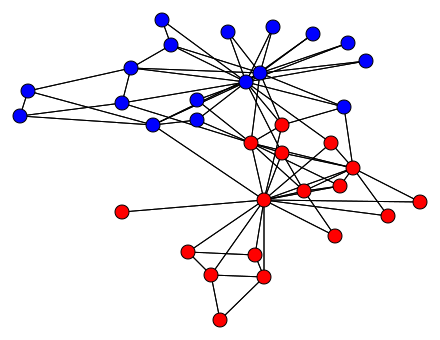

In [235]:
SVG(image)

## To do

* Apply hierarchical clustering to the embedding in dimension 3.
* Display the dendrogram.
* Display the best clustering.
* Compare with the ground-truth using ARI and AMI.

In [236]:
gsvd = GSVD(n_components=3)

In [ ]:
gsvd = GSVD(n_components=3)
X = gsvd.fit_transform(adjacency)

In [237]:
X = gsvd.fit_transform(adjacency)

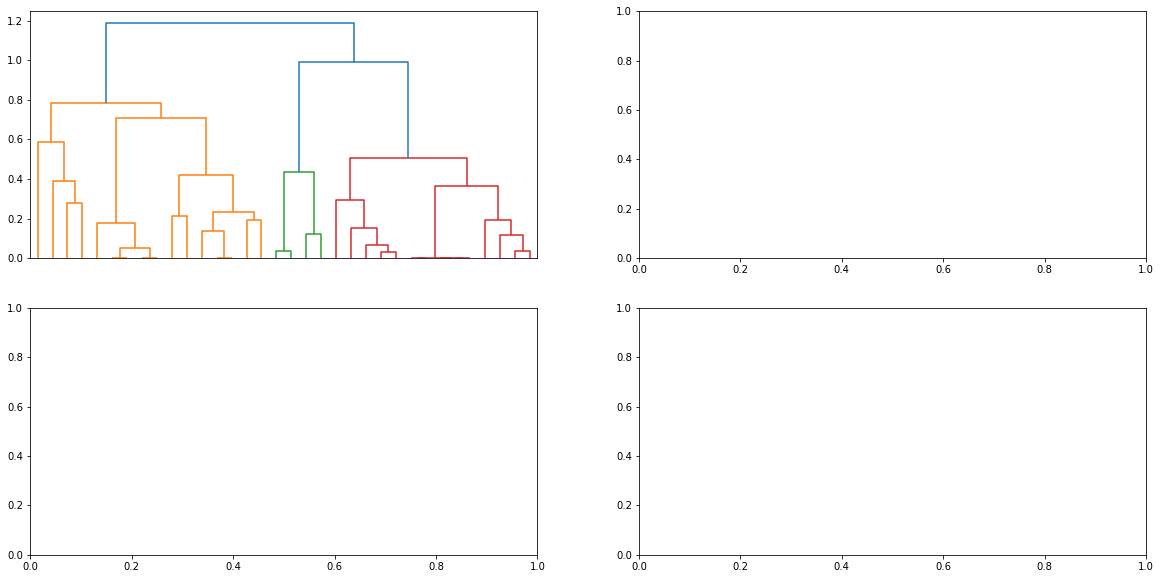

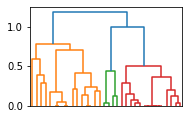

In [275]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

plt.subplot(2,2,1)

gsvd = GSVD(n_components=3)
X = gsvd.fit_transform(adjacency)
Z = linkage(X, method='average')
dendrogram(Z, no_labels=True)
plt.show()

plt.subplot(2,2,2)
Z = linkage(X, method='average')
dendrogram(Z, no_labels=True)
plt.show()



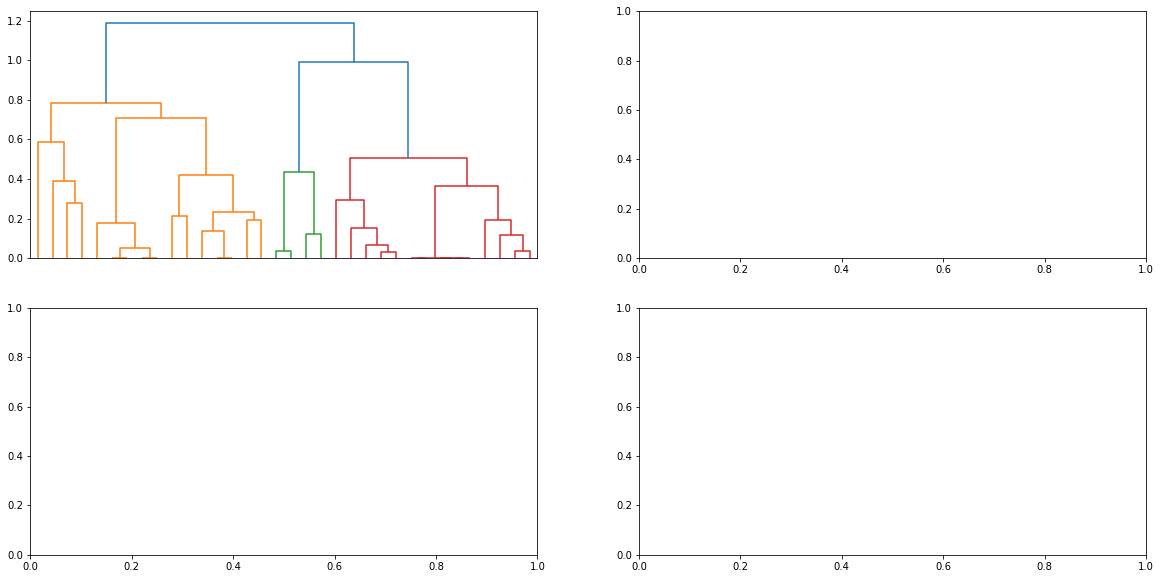

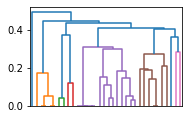

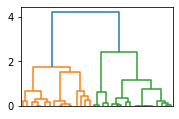

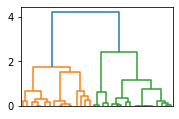

In [254]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

ax[0] = plt.subplot(2,2,1)
Z = linkage(X, method='average')
dendrogram(Z, no_labels=True)
plt.show()

ax[1] = plt.subplot(2,2,2)
Z = linkage(X, method='single')
dendrogram(Z, no_labels=True)
plt.show()

plt.subplot(223)
Z = linkage(X, method='ward')
dendrogram(Z, no_labels=True)
plt.show()

plt.subplot(224)
#Z = linkage(X, method='max')
dendrogram(Z, no_labels=True)
plt.show()

## Openflights

In [255]:
graph = load_netset('openflights')

Parsing files...
Done.


In [256]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [257]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

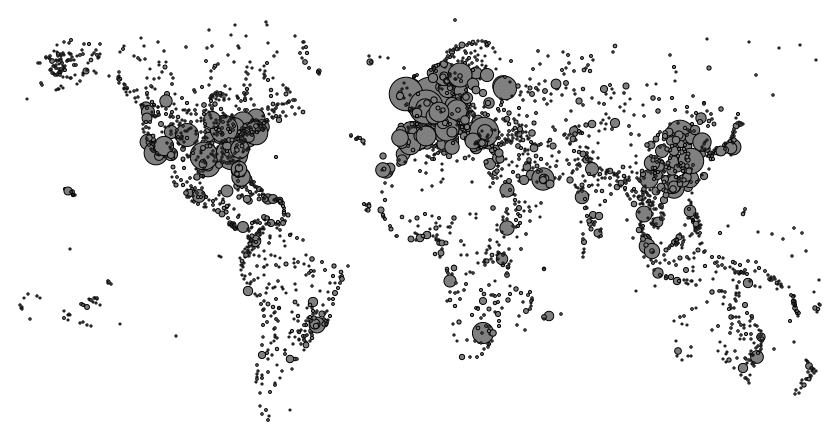

In [258]:
SVG(image)

## To do

* Apply hierarchical clustering to the embedding in dimension 20.
* Select the 2 best clusterings.
* For each of these 2 clusterings, display the graph with the corresponding labels.
* Apply hierarchical clustering to the top-100 airports in terms of traffic (i.e., to the corresponding 100 vectors in the embedding space). Display the dendrogram with the names of these airports. <br>
**Hint:** Check the ``orientation`` parameter of the function ``dendrogram``.

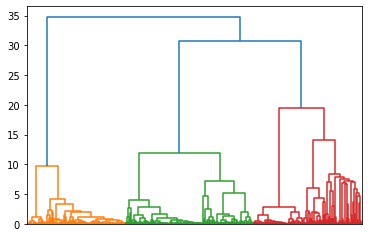

In [287]:
gsvd = GSVD(n_components=20)
X = gsvd.fit_transform(adjacency)
Z = linkage(X, method='ward');
dendrogram(Z, no_labels=True)
plt.show();

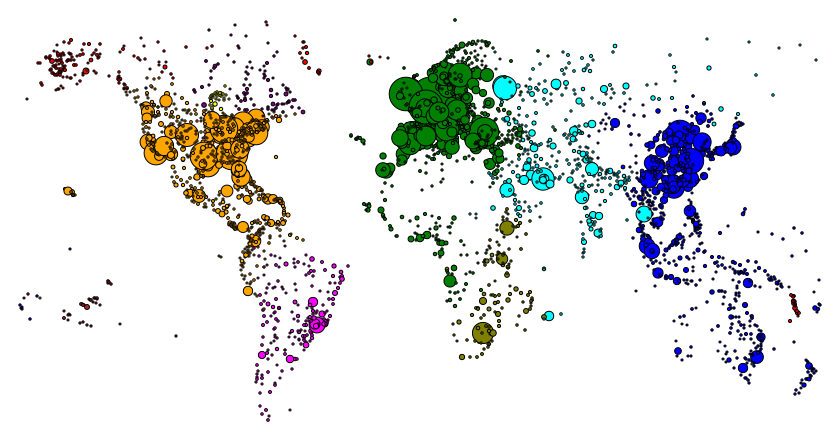

In [296]:
y_pred = cut_tree(Z,12).ravel()
image = svg_graph(adjacency, position, labels = y_pred, width = 800, height = 400, display_node_weight=True, display_edges=False)
SVG(image)

In [297]:
adjacency.data

array([1, 1, 1, ..., 2, 3, 1])

In [306]:
# Top 100 airports
n = len(names)
traffic = adjacency.dot(np.ones(n))
top_airports = np.argsort(-traffic)[:100]
names[top_airports]

array(['Amsterdam Airport Schiphol',
       'Charles de Gaulle International Airport', 'Dublin Airport',
       'Munich International Airport',
       'Hartsfield Jackson Atlanta International Airport',
       'London Gatwick Airport',
       'Frankfurt am Main International Airport',
       'Atatürk International Airport',
       'Dallas Fort Worth International Airport',
       'Beijing Capital International Airport', 'Brussels Airport',
       "Chicago O'Hare International Airport", 'Manchester Airport',
       'London Heathrow Airport', 'Shanghai Pudong International Airport',
       'Barcelona International Airport', 'Stockholm-Arlanda Airport',
       'Leonardo da Vinci–Fiumicino Airport',
       'Los Angeles International Airport',
       'George Bush Intercontinental Houston Airport',
       'John F Kennedy International Airport', 'Oslo Gardermoen Airport',
       'London Stansted Airport', 'Domodedovo International Airport',
       'Adolfo Suárez Madrid–Barajas Airport',
     

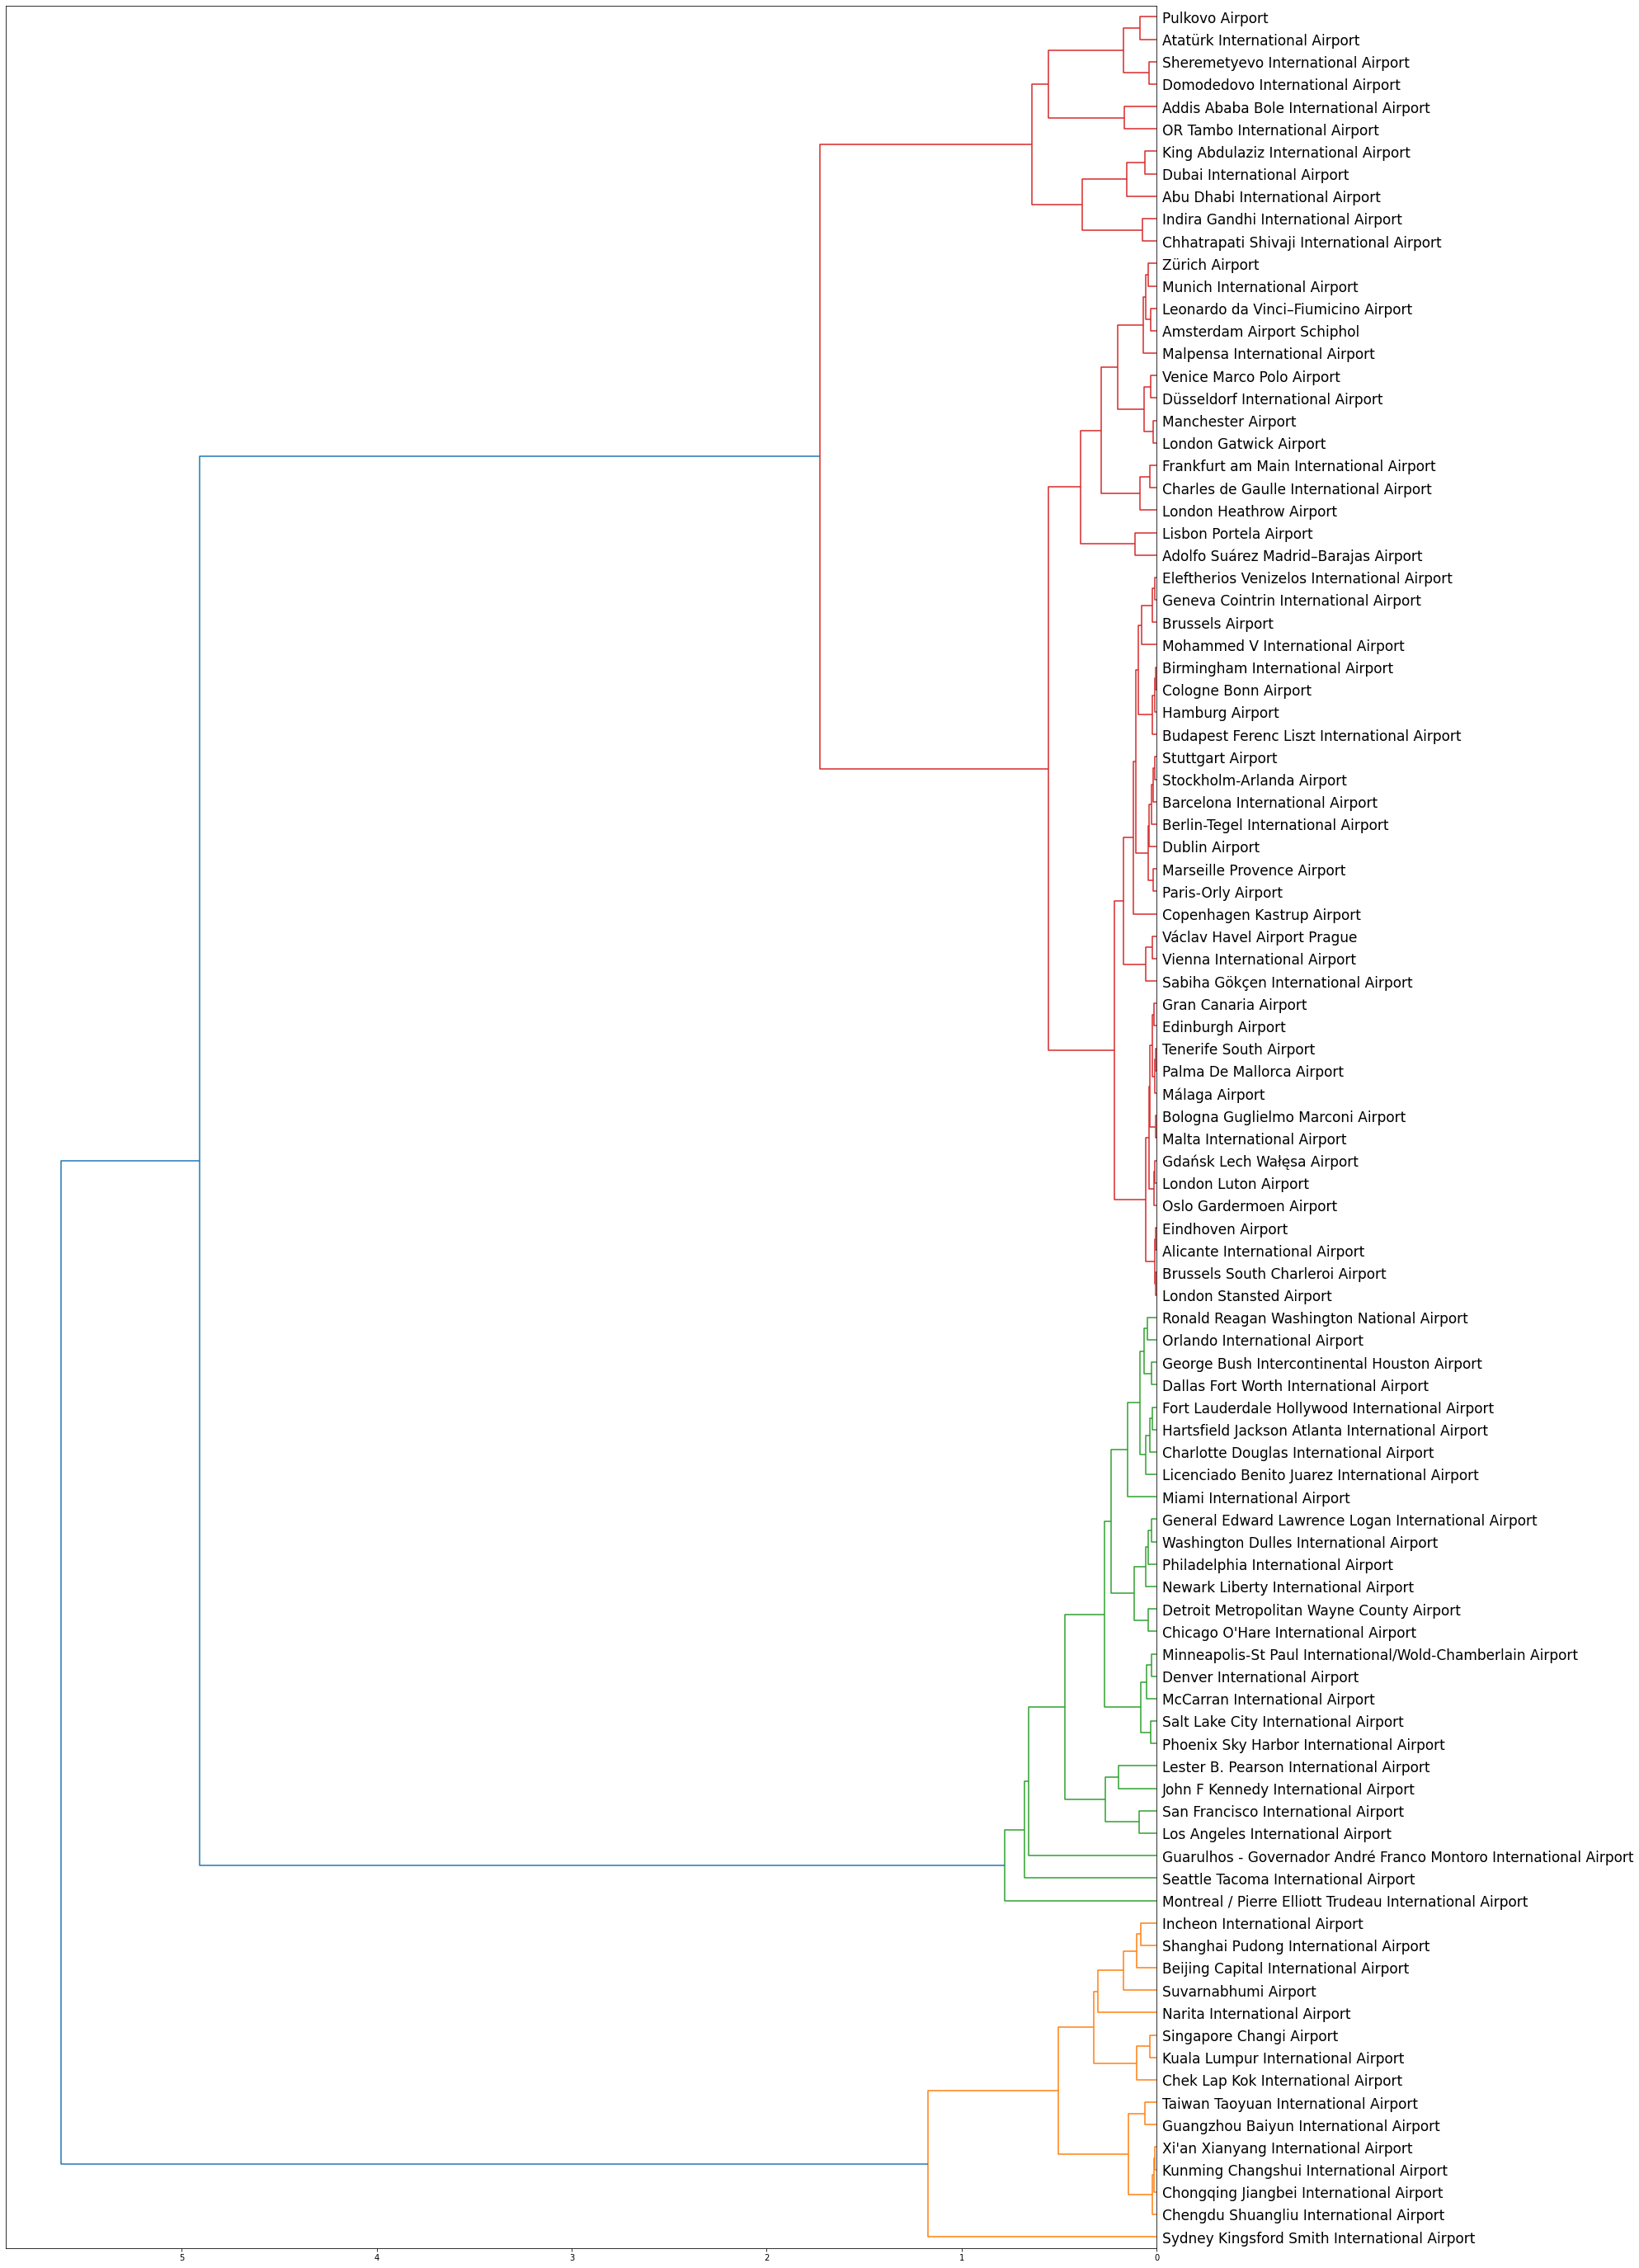

In [315]:
fig, ax = plt.subplots(figsize=(25,50))
gsvd = GSVD(n_components=20)
X = gsvd.fit_transform(adjacency)
Z = linkage(X[top_airports], method='ward');
dendrogram(Z, labels=names[top_airports], orientation='left', leaf_font_size=17)
plt.show();

## Wikipedia

In [330]:
graph = load_netset('wikivitals')

Parsing files...
Done.


In [331]:
adjacency = graph.adjacency
names = graph.names
labels = graph.labels

## To do

* Apply hierarchical clustering to the embedding in dimension 20.
* Select the 2 best clusterings and compare with the ground-truth in terms of ARI and AMI.
* Select the clustering with 20 clusters. List the top 3 articles of each cluster in terms of PageRank.
* Apply hierarchical clustering to the top-100 articles in terms of PageRank.
Display the dendrogram with the names of these articles.

In [332]:
#fig, ax = plt.subplots(figsize=(25,50))
gsvd = GSVD(n_components=20)
X = gsvd.fit_transform(adjacency)
Z = linkage(X, method='ward')
cuts = get_best_cuts(Z, k_max=50)
cuts
y_pred = cut_tree(Z, cuts)
y_pred

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  1,  1,  1],
       ...,
       [ 0,  2,  4, ...,  4,  4,  4],
       [ 0,  2,  3, ..., 13, 11, 13],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [324]:
from sknetwork.ranking import PageRank

pagerank = PageRank()

In [326]:
scores = pagerank.fit_transform(adjacency)
scores

array([3.35351068e-05, 2.68529834e-05, 2.97212339e-05, ...,
       3.88462388e-05, 4.44575224e-05, 1.95538259e-05])

In [328]:
y_pred = cut_tree(Z, 20)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [4],
       [3],
       [0]])

In [329]:
for label in range(20):
    print(label, names[np.argsort(-scores * (y_pred == label))])

0 [['United States' 'World War II' 'The New York Times' ...
  'Estée Lauder (businesswoman)'
  'The Common Sense Book of Baby and Child Care'
  "Banc d'Arguin National Park"]
 ['United States' 'World War II' 'The New York Times' ...
  'Estée Lauder (businesswoman)'
  'The Common Sense Book of Baby and Child Care'
  "Banc d'Arguin National Park"]
 ['0' 'Origin myth' 'Origin of language' ...
  'Fundamental theorem of arithmetic' 'Fula language' '−1']
 ...
 ['0' 'Origin myth' 'Origin of language' ...
  'Fundamental theorem of arithmetic' 'Fula language' '−1']
 ['0' 'Origin myth' 'Origin of language' ...
  'Fundamental theorem of arithmetic' 'Fula language' '−1']
 ['United States' 'World War II' 'The New York Times' ...
  'Estée Lauder (businesswoman)'
  'The Common Sense Book of Baby and Child Care'
  "Banc d'Arguin National Park"]]
1 [['0' 'Origin myth' 'Origin of language' ...
  'Fundamental theorem of arithmetic' 'Fula language' '−1']
 ['0' 'Origin myth' 'Origin of language' ...
  'Fun

KeyboardInterrupt: 